In [130]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Subtask 1: Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum

### Given: generation of initial data

In [131]:
# generate the signal
t = np.linspace(-20 * 2*np.pi, 20 * 2*np.pi, 3**9 + 6)
y = np.sin(t) * np.exp(-t**2 / (2 * 20**2))
y = y + np.sin(3 * t) * np.exp(-(t - 5 * 2*np.pi)**2 / (2 * 20**2))
y = y + np.sin(5.5 * t) * np.exp(-(t - 10 * 2*np.pi)**2 / (2 * 5**2))

### Adding the 4th wave packet

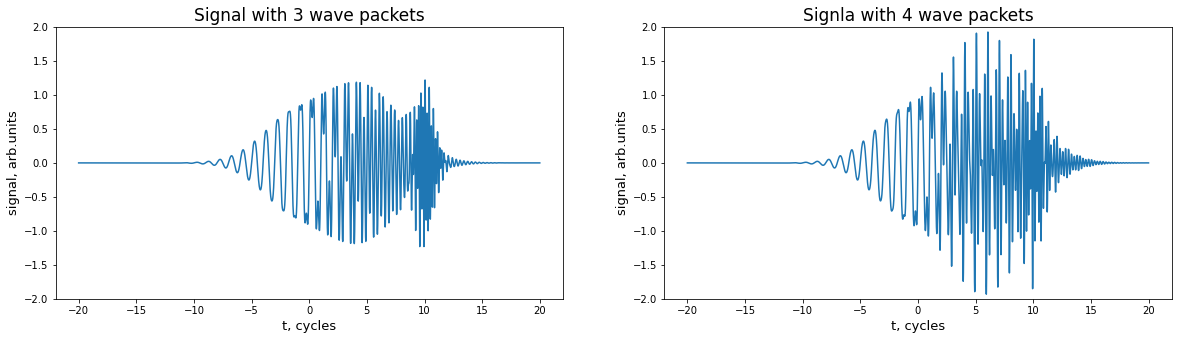

In [134]:
freq = 4
time_shift = 7

y_new = y + np.sin(freq * t) * np.exp(-(t - time_shift * 2*np.pi)**2 / (2 * 20**2))

fig, (ax, bx) = plt.subplots(1, 2, figsize = (20, 5))
ax.plot(t/2/pi, y)
bx.plot(t/2/pi, y_new)

ax.set_xlabel('t, cycles', fontsize = 13)
ax.set_ylabel('signal, arb.units', fontsize = 13)
ax.set_ylim(-2, 2)
ax.set_title('Signal with 3 wave packets', fontsize = 17)

bx.set_xlabel('t, cycles', fontsize = 13)
bx.set_ylabel('signal, arb.units', fontsize = 13)
bx.set_ylim(-2, 2)
bx.set_title('Signla with 4 wave packets', fontsize = 17)

plt.show()

### Given: construction of Fourier spectrum

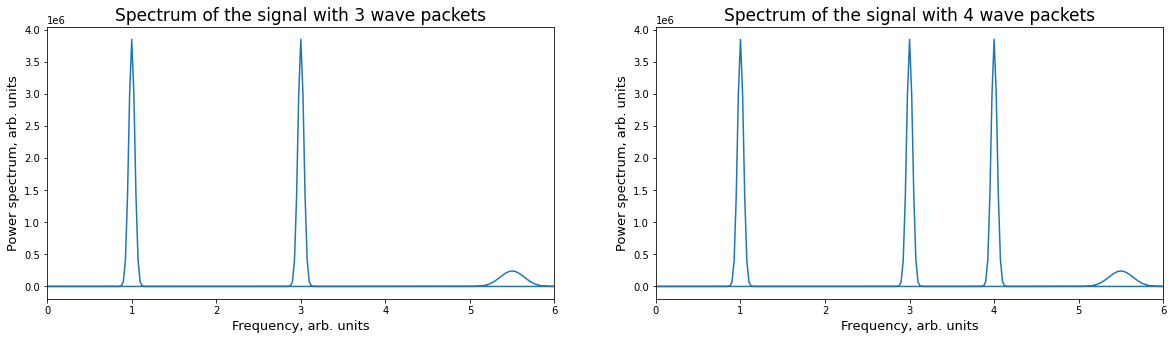

In [133]:
# Fourier spectrum
sp = np.fft.fft(y)
w = np.fft.fftfreq(len(y), d = (t[1] - t[0]) / (2 * np.pi))

sp_new = np.fft.fft(y_new)
w_new = np.fft.fftfreq(len(y_new), d = (t[1] - t[0]) / (2 * np.pi))

fig, (graph1, graph2) = plt.subplots(1, 2, figsize = (20, 5))
graph1.plot(w, abs(sp)**2)
graph1.set_xlim(0, 6)
graph1.set_xlabel('Frequency, arb. units', fontsize = 13)
graph1.set_ylabel('Power spectrum, arb. units', fontsize = 13)
graph1.set_title('Spectrum of the signal with 3 wave packets', fontsize = 17)

graph2.plot(w, abs(sp_new)**2)
graph2.set_xlim(0, 6)
graph2.set_xlabel('Frequency, arb. units', fontsize = 13)
graph2.set_ylabel('Power spectrum, arb. units', fontsize = 13)
graph2.set_title('Spectrum of the signal with 4 wave packets', fontsize = 17)

plt.show()

In the second figure, it is seen that the adding of the 4th wave packet leads to the apperance of one additional peak at the frequency = 4 arb. units.

## Subtask 2: Implement the spectrogram, show the effect of 1 on the spectrogram. Don’t forget to label the axes

### Calculation of the window function

In [122]:
def WindowFunction(t, window_position, window_width):
    return np.exp(-(t - window_position)**2 / 2 / window_width**2)

### Construction of a spectrogram

In [123]:
def get_specgram(y, t, nwindowsteps, window_width):
    window_positions = np.linspace(-20 * 2*np.pi, 20 * 2*np.pi, nwindowsteps)
    specgram = np.zeros((len(t), nwindowsteps))

    for i in range(nwindowsteps):
        sp = np.fft.fft(y * WindowFunction(t, window_positions[i], window_width))
        specgram[:, i] = abs(sp)**2

    return specgram

### Plotting the spectrogram

In [124]:
def PlotSpectrogram(spectrogram, t, w, title):
    
    plt.figure(figsize(12, 8))
    plt.imshow(spectrogram, aspect = 'auto', extent = [min(t) / (2*np.pi), max(t) / (2*np.pi), w[0], 2 * w[int(len(w) / 2) - 1]])
    plt.ylim(0, 7)

    cbar = plt.colorbar()
    cbar.set_label('Power spectrum', fontsize = 15)
    
    plt.title(title, fontstyle = 'oblique', fontsize = 20)
    plt.xlabel('Time, cycles', fontsize = 15)
    plt.ylabel('Frequency, arb. units', fontsize = 15)
    
    plt.show()

### Main function call

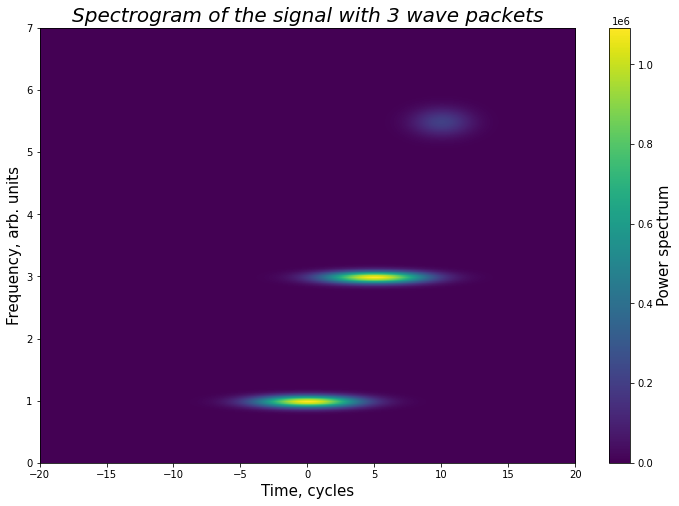

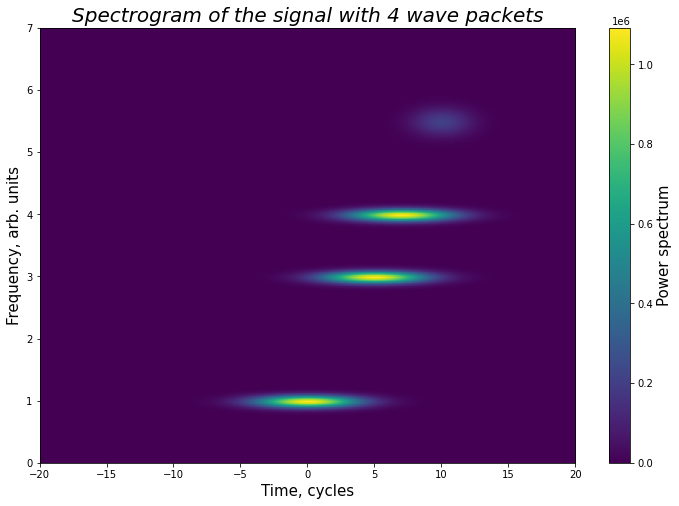

In [125]:
nwindowsteps = 1000
window_width = 2.0 * 2 * np.pi

w = np.fft.fftfreq(len(y), d=(t[1]-t[0]) / (2*np.pi))
w_new = np.fft.fftfreq(len(y_new), d=(t[1]-t[0]) / (2*np.pi))

spectogram = get_specgram(y, t, nwindowsteps, window_width)
spectogram_new = get_specgram(y_new, t, nwindowsteps, window_width)

PlotSpectrogram(spectogram, t, w, 'Spectrogram of the signal with 3 wave packets')
PlotSpectrogram(spectogram_new, t, w_new, 'Spectrogram of the signal with 4 wave packets')

It is clearly seen that the adding of the 4th wave packet leads to the appearance of the additional bright spot at frequency = 4 and time = 7 cycles that corresponds to the additional peak at the Fourier spectrum shown above.

## Subtask 3: Change the number of time steps in your signal to the power of 2 and then slightly change the number of timesteps.  Measure the timing, can you explain the difference?

In [126]:
def signal(freq, shift, x, t):
    return np.sin(freq * t) * exp(-(t - shift * 2*np.pi)**2 / (2 * x**2))

In [127]:
ntimesteps = 2**14
nwindowsteps = 1000
window_width = 2.0 * 2 * pi

for i in range(-8, 9):
    t = np.linspace(-20 * 2*np.pi, 20 * 2*np.pi, ntimesteps + i)
    y_my = signal(1, 0, 20, t) + signal(3, 5, 20, t) + signal(5.5, 10, 5, t) + signal(4, 7, 20, t)
    
    time_start = time.time()
    spectrogram = get_specgram(y_my, t, nwindowsteps, window_width)
    work_time = time.time() - time_start
    
    print(f'Number of time steps = 2^14 + {i} => time of work = {work_time:.4f} s')

Number of time steps = 2^14 + -8 => time of work = 1.1585 s
Number of time steps = 2^14 + -7 => time of work = 1.3861 s
Number of time steps = 2^14 + -6 => time of work = 2.2029 s
Number of time steps = 2^14 + -5 => time of work = 2.3258 s
Number of time steps = 2^14 + -4 => time of work = 0.7829 s
Number of time steps = 2^14 + -3 => time of work = 2.2138 s
Number of time steps = 2^14 + -2 => time of work = 2.2685 s
Number of time steps = 2^14 + -1 => time of work = 1.5367 s
Number of time steps = 2^14 + 0 => time of work = 0.6616 s
Number of time steps = 2^14 + 1 => time of work = 1.3853 s
Number of time steps = 2^14 + 2 => time of work = 2.5853 s
Number of time steps = 2^14 + 3 => time of work = 2.5073 s
Number of time steps = 2^14 + 4 => time of work = 2.4633 s
Number of time steps = 2^14 + 5 => time of work = 2.4867 s
Number of time steps = 2^14 + 6 => time of work = 2.4737 s
Number of time steps = 2^14 + 7 => time of work = 2.4766 s
Number of time steps = 2^14 + 8 => time of work 

According to the obtained results, the program works faster if the number of time steps can be written as 2^k. Moreover, it is the fastest when n is even. Such behavior can be explained in the following way: during our calculations we use np.ftt.ftt; in conjunction with the information on the official site (https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html), calculations are performed in a more efficient way via using symmetries in the calculated terms. The symmetry is, in turn, the highest when n is a power of 2.